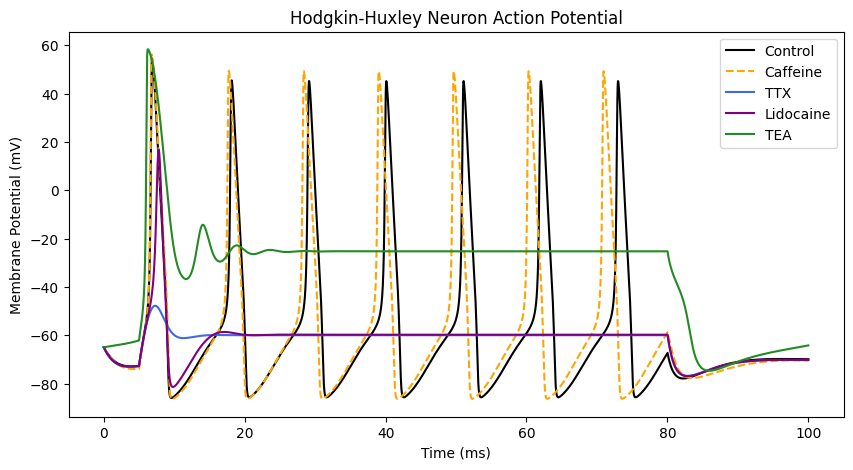

In [44]:
import numpy as np
import matplotlib.pyplot as plt

#figures
C_m   = 1.0    #membrane potential
V_rest = -65.0 #voltage of membrane at rest

g_Na = 100    #maximum conductance of Na channel
g_K = 25      #maximum conductance of K channel  

E_Na = 60     #reverse potential of Na channel 
E_k = -90     #reverse potential of K channel

g_L = 0.3
E_L = -65



#now finding alpha and beta of n,m,h

def alpha_n(V):
    return 0.01*(V+55)/(1-np.exp(-(V+55)/10))

def beta_n(V):
    return 0.125*np.exp(-(V+65)/80)

def alpha_m(V):
    return 0.1*(V+40)/(1-np.exp(-(V+40)/10))

def beta_m(V):
    return 4*np.exp(-(V+65)/18)

def alpha_h(V):
    return 0.07*(np.exp(-(V+65)/20))

def beta_h(V):
    return 1/(1+np.exp(-(V+35)/10))
    

#defining time and initializing n,m,h,V,I


def run_HH(Na,L,K):
 t = 100
 dt = 0.02
 T = np.arange(0,t+dt,dt)
 V = np.zeros(len(T))
 n = np.zeros(len(T))
 m = np.zeros(len(T))
 h = np.zeros(len(T))

 def I_ext(time):
    return 20 if 5<=time<=80 else 0



 n[0] = alpha_n(V_rest)/(alpha_n(V_rest)+beta_n(V_rest))
 m[0] = alpha_m(V_rest)/(alpha_m(V_rest)+beta_m(V_rest))
 h[0] = alpha_h(V_rest)/(alpha_h(V_rest)+beta_h(V_rest))
 V[0] = V_rest

 for i in range(1,len(T)):
    v = V[i-1]
    n[i] = (alpha_n(v)*(1-n[i-1]) - beta_n(v)*(n[i-1]))*dt + n[i-1] 
    m[i] = (alpha_m(v)*(1-m[i-1]) - beta_m(v)*(m[i-1]))*dt + m[i-1]
    h[i] = (alpha_h(v)*(1-h[i-1]) - beta_h(v)*(h[i-1]))*dt + h[i-1] 

    I_K = K*(n[i]**4)*(v-E_k)
    I_Na = Na*(m[i]**3)*(h[i])*(v-E_Na)
    I_L = L * (v - E_L) 

    V[i] = v + dt*(I_ext(T[i-1])-I_Na-I_K-I_L)/C_m

 return T,V


T, V_control = run_HH(g_Na,g_L,g_K)
_,V_caffeine = run_HH(g_Na*1.2,g_L*0.7,g_K)
T,V_TTX = run_HH(0,g_L,g_K)
T,V_Lid = run_HH(g_Na*0.2,g_L,g_K)
T,V_TEA = run_HH(g_Na,g_L,g_K*0.1)
    
#line graph between complete voltage of a neuron and time

plt.figure(figsize=(10,5))
plt.plot(T, V_control, color="black", label="Control")
plt.plot(T, V_caffeine, linestyle="--", color="orange", label="Caffeine")
plt.plot(T, V_TTX, color="royalblue", label="TTX")
plt.plot(T, V_Lid, color="purple", label="Lidocaine")
plt.plot(T, V_TEA, color="forestgreen", label="TEA")

plt.title("Hodgkin-Huxley Neuron Action Potential")
plt.ylabel("Membrane Potential (mV)")
plt.xlabel("Time (ms)")
plt.legend()
plt.show()




